## DSCI Group Project (Group 89: Ava Alexander, Fangzhou Ye, Maya Seethram)

#### Predictive Question: Can we predict whether or not a class has completed a test preparation course based on their test results?


### INTRODUCTION

Are high marks in school a result of hardwork and effort, or simply a result of high natural intelligence? There always seem to be students who achieve high grades without having studied all semester. We want to explore whether success in exams can be achieved by natural intelligence alone, or whether hard work and studying is necessary to succeed. Barbarick and Ippolito (2003) found that, on average, we see higher predicted exam scores in students that spend more time studying rather than the students who spend less time. Further, there may be a difference between the need for natural intelligence versus time spent studying dependent on the course subject (Masui et al., 2014). 


We would like to try to predict the following question: Can we use the academic test scores of varying school subjects available to us to predict whether a student has completed a test preparation course prior to their test?


We will be using a dataset of student exam scores at public schools. The dataset provides data for whether or not the student completed a test preparation course prior to the test, as well as their math, reading, and writing scores from the test. We will use this data to explore the relation between exam scores and preparation taken. 


### METHODS

Overall: we must do the following:

1. Load in our data from the web
2. Tidy and wrangle our data
3. Summarize our data to include only the relevant information
4. Visualize our data in multiple ways
5. Analyze our data (build our classifier)
6. Interpret our analysis by creating a visualization

Each step is explored in depth below.

#### 1.0
First, we loaded the tidyverse and tidymodels packages 

In [14]:
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(cowplot)

#### 1.1
We loaded our dataset "exams" as a .csv file from the original web source.  We used the read_csv function and saved it to the object exam_data

#### Table 1.0: Exam Data (Full Data Frame)

In [15]:
exam_data <- read_csv("https://raw.githubusercontent.com/mayas02/dsci-100-2022w1-group-89/main/exams.csv")
head(exam_data)

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, race/ethnicity, parental level of education, lunch, test pr...
dbl (3): math score, reading score, writing score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
male,group A,high school,standard,completed,67,67,63
female,group D,some high school,free/reduced,none,40,59,55
male,group E,some college,free/reduced,none,59,60,50
male,group B,high school,standard,none,77,78,68
male,group E,associate's degree,standard,completed,78,73,68
female,group D,high school,standard,none,63,77,76


#### 2.0
We began tidying our data by replacing the spaces in the column names using the make.names function so that we can use the tidyverse functions.

#### Table 2.0: Exam Data With New column Names (Full Data Set)

In [16]:
#Change the col name
colnames(exam_data) <- make.names(colnames(exam_data))
head(exam_data)

gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
male,group A,high school,standard,completed,67,67,63
female,group D,some high school,free/reduced,none,40,59,55
male,group E,some college,free/reduced,none,59,60,50
male,group B,high school,standard,none,77,78,68
male,group E,associate's degree,standard,completed,78,73,68
female,group D,high school,standard,none,63,77,76


#### 3.0

We mutated the exam data and selected for the columns we will use.  We decided to exclude other non-numeric variables and only focus on numeric variables to classify possible students as either completed or not completed their test preparation based on their three exam grades.  

We chose to focus on the following three numeric variables: "reading score", "writing score", "math score".  We wanted to investigate if exam success in one subject was correlated with success in another subject, and we wanted to see if completing the test preparation course impacts student's exam outcomes.

Therefore, we decided to use these three numerical variables to predict the categorical variable of "test preparation course".  This allows us to predict whether or not a student completed their test preparation based on their test scores.

After deciding this, we mutated the data so that the "test.preparation.course" contained factors instead of character variable types.  Having a "completed" status in the test preparation course column now corresponds to the number 1, while an "none" status corresponds to 0.

#### Table 3.0: Mutated Exam Data

In [17]:
#Make the test.preparation.course 0 and 1 then as factor
exam <- exam_data |>
mutate(test.preparation.course = ifelse(test.preparation.course == "completed", 1, 0)) |>
mutate(test.preparation.course = as_factor(test.preparation.course)) |>
select(test.preparation.course, math.score, reading.score, writing.score)
head(exam)

test.preparation.course,math.score,reading.score,writing.score
<fct>,<dbl>,<dbl>,<dbl>
1,67,67,63
0,40,59,55
0,59,60,50
0,77,78,68
1,78,73,68
0,63,77,76


#### 4.0
We found the mean and median and standard deviation of each  variable  (math score, writing score, and reading score) to better understand the variation between the three variables.  We observed that all three test scores were within the same range of each other, and had similar standard deviations, therefore we do not need to further transform these variables before we compare them (i.e., they are in the same units and of the same magnitude).  

#### Table 4.0: Exam Data Statistics Summary

In [18]:
exam_summary <- exam |>
  summarize(math_mean = mean(math.score), reading_mean = mean(reading.score), writing_mean = mean(writing.score),math_med = median(math.score),
            reading_med = median(reading.score), writing_med = median(writing.score),
            math_sd = sd(math.score), reading_sd = sd(reading.score), writing_sd = sd(writing.score))
exam_summary

math_mean,reading_mean,writing_mean,math_med,reading_med,writing_med,math_sd,reading_sd,writing_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
66.396,69.002,67.738,66.5,70,68,15.40287,14.73727,15.60099


#### 4.1
We then generated 3 box plots as a way to visualize students’ ranges of scores in each of the three exam subjects.  We initially observed from the box plots that on average, students that completed their test preparation, had higher scores.  This pattern was strongest for the writing exams.

#### Figure 4.0: Exam Data Boxplots

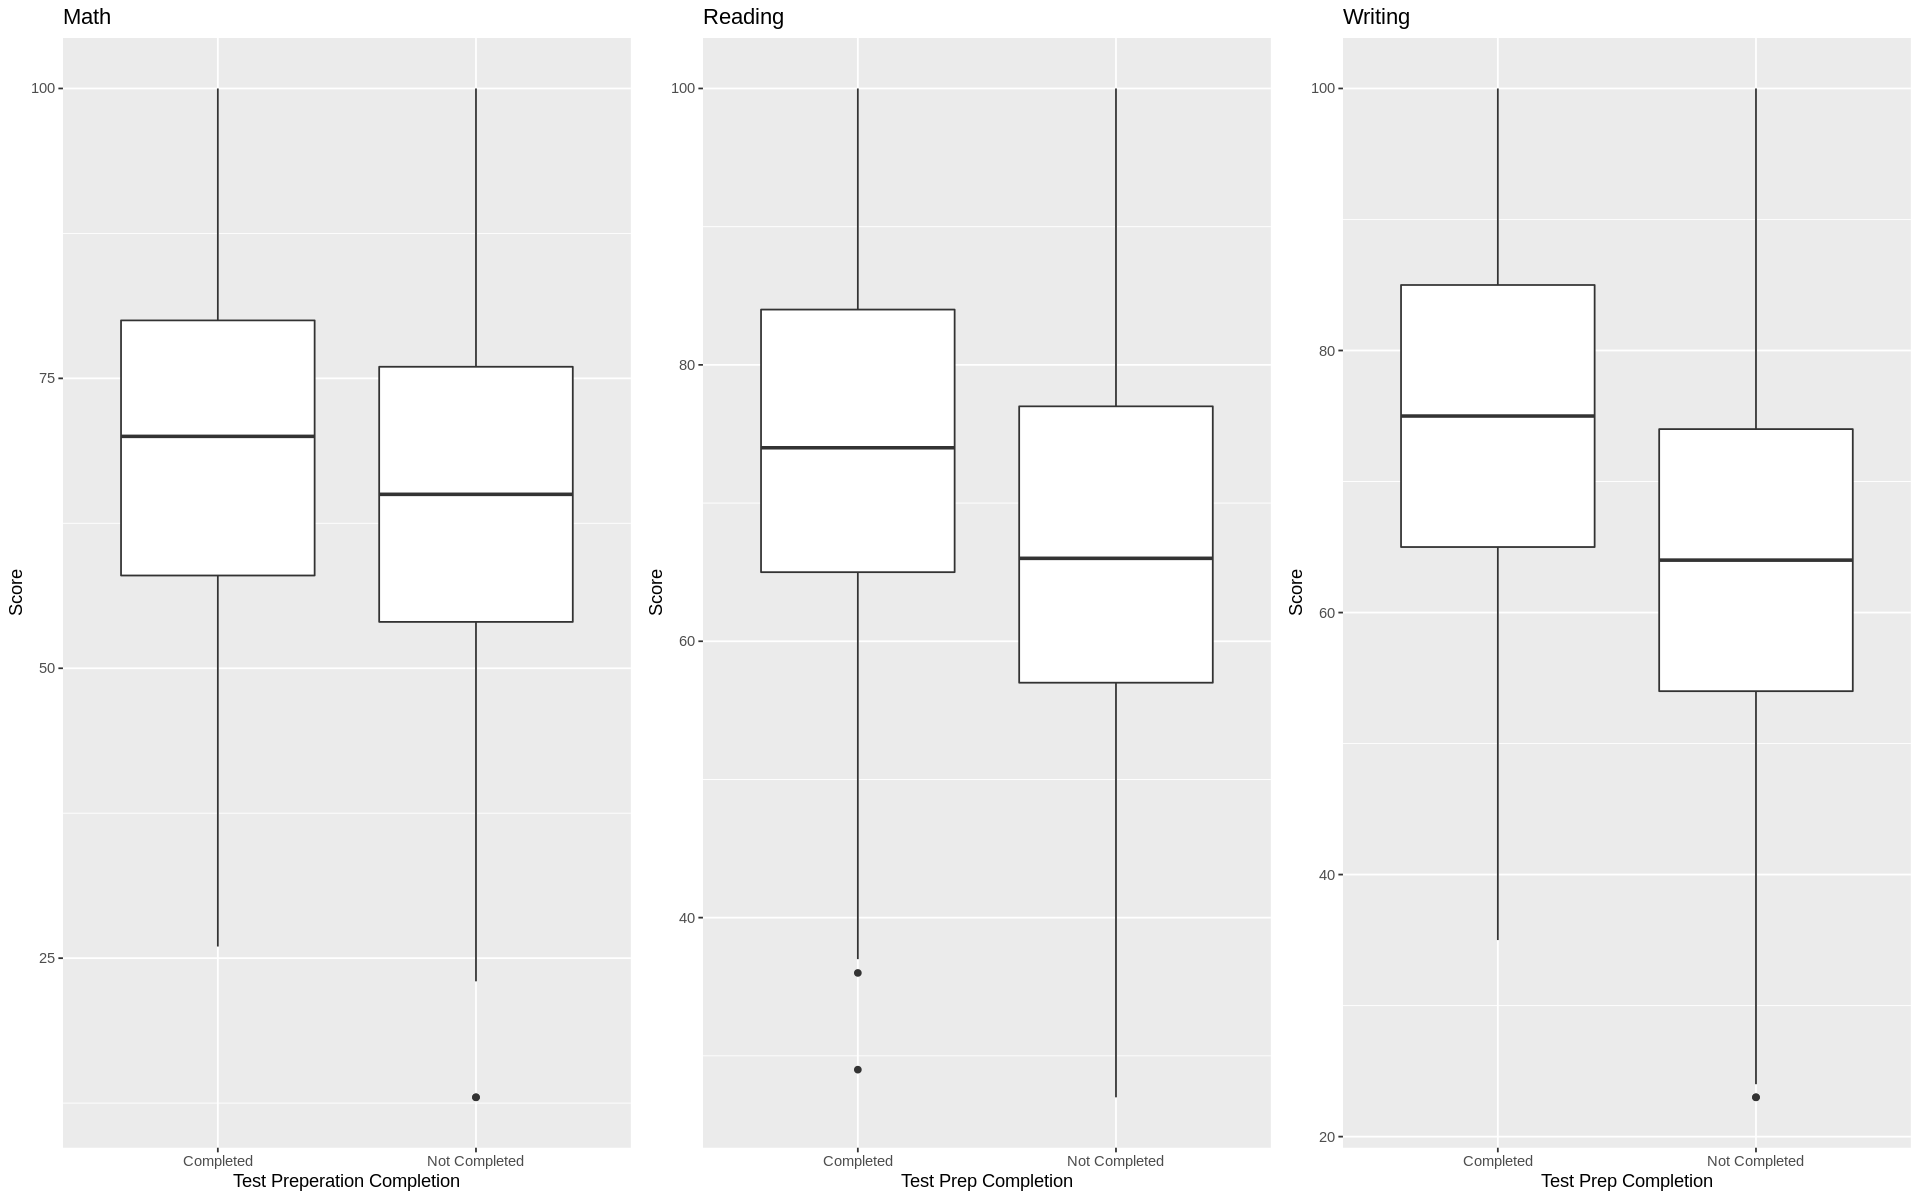

In [19]:
# Show box plot
options(repr.plot.width = 16, repr.plot.height = 10)
exam1 <- exam %>%
    mutate(test.preparation.course = ifelse(test.preparation.course == 1, "Completed", "Not Completed"))

bp1 <-ggplot(exam1,aes(x=test.preparation.course,y=math.score)) +
        geom_boxplot() +
        labs(x='Test Preperation Completion',y='Score') +
        ggtitle('Math')
bp2 <-ggplot(exam1,aes(x=test.preparation.course,y=reading.score)) +
        geom_boxplot() +
        labs(x='Test Prep Completion',y='Score') +
        ggtitle('Reading')
bp3 <-ggplot(exam1,aes(x=test.preparation.course,y=writing.score)) +
        geom_boxplot() +
        labs(x='Test Prep Completion',y='Score')+
        ggtitle('Writing')


plot_grid(bp1,bp2,bp3,ncol = 3)


#### 4.2
We then generated 3 scatter plots to visualize the correlation between each of three variables (instead of generating a plot in 3-dimensions).  These scatter plots showed that all three variables are strongly, positively correlated with each other (i.e. if you do well on math or reading, you are likely to get a good score on the writing exam as well).  Reading and writing scores were the most tightly correlated out of the 3 scatter plots.   Additionally, by coloring the points by test preparation status (completed or not completed), we were able to observe a general pattern: students who completed their test preparation received better scores on all sections (math reading, writing) of their examinations.


#### Figure 4.1: Exam Score Scatterplots

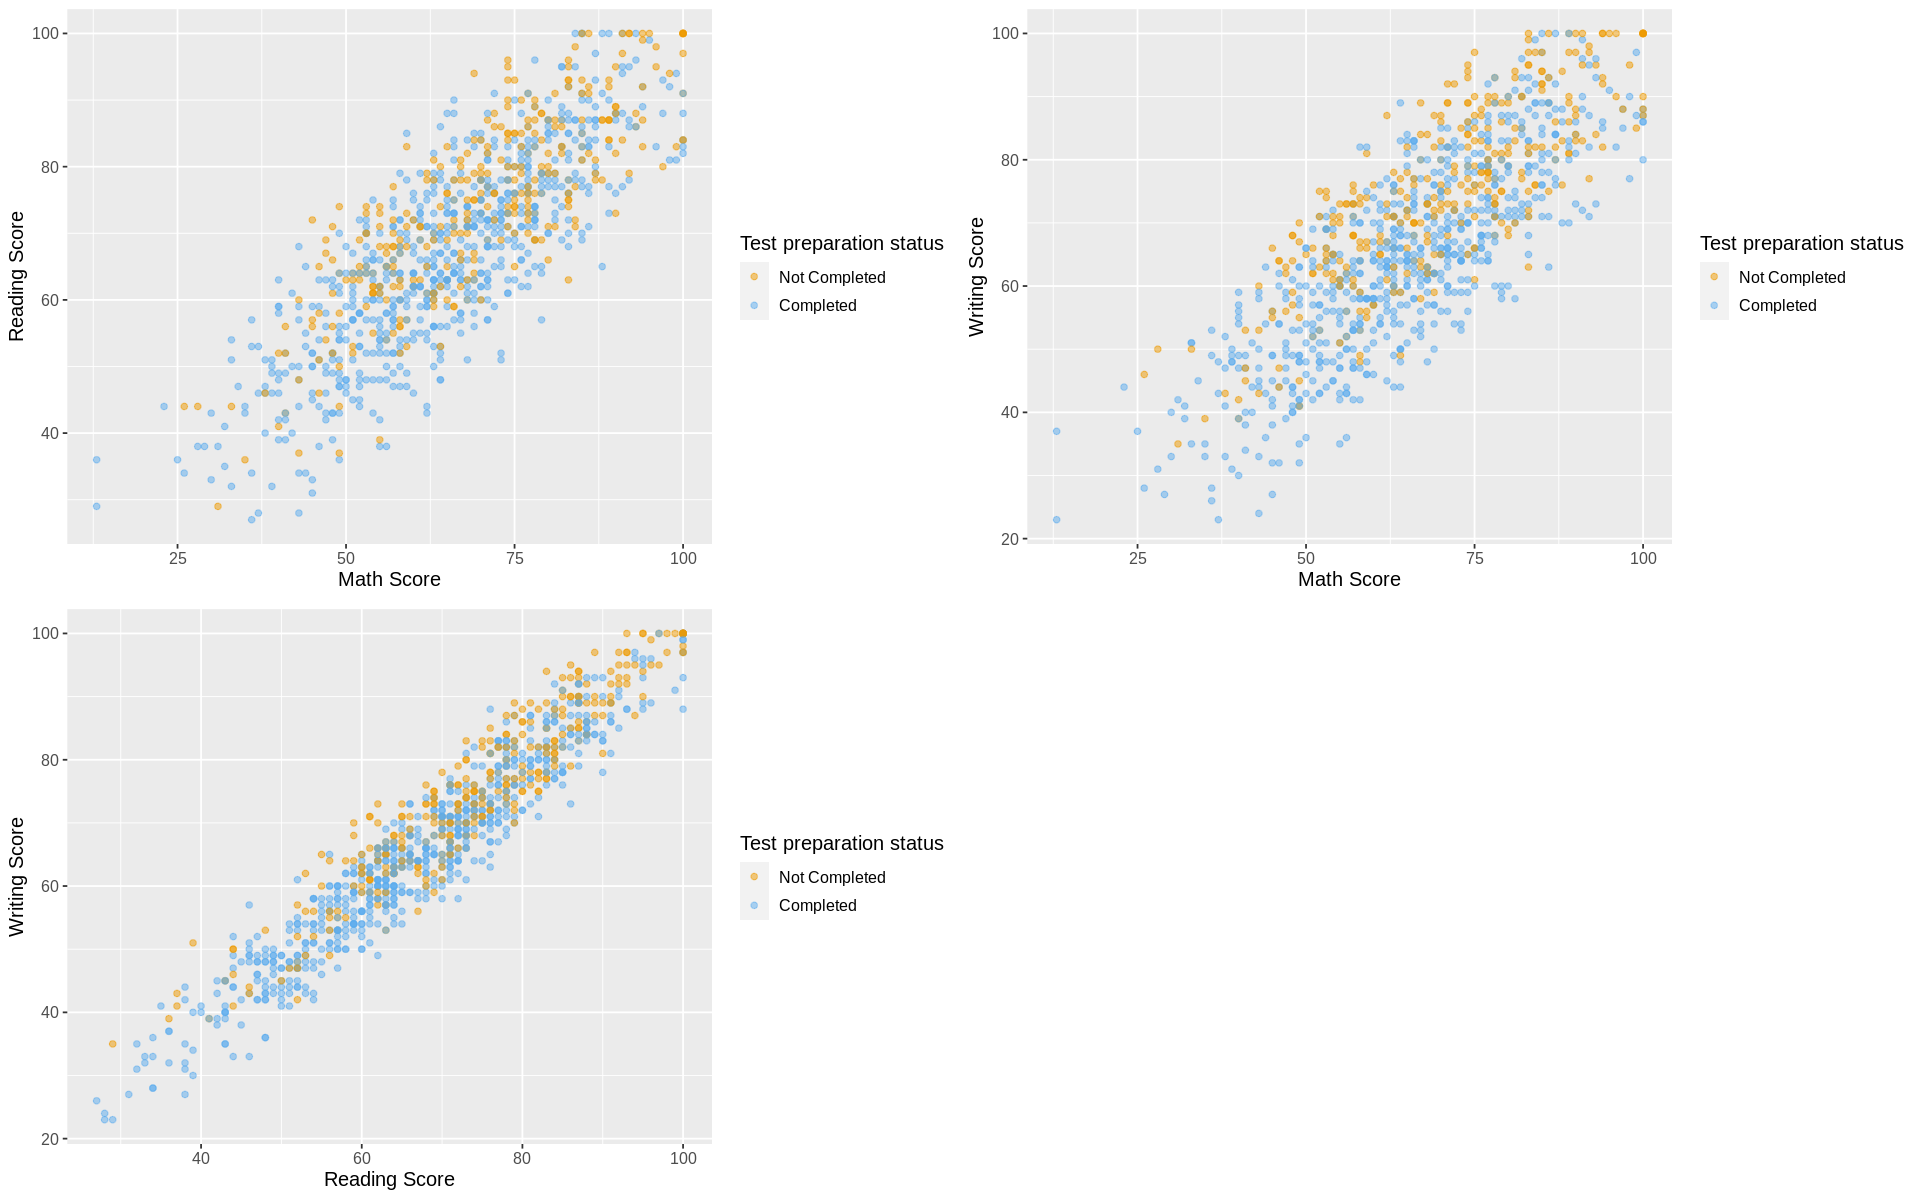

In [20]:
options(repr.plot.width = 16, repr.plot.height = 10)
exam_plot1 <- exam1 |>
  ggplot(aes(x = math.score, y = reading.score, color = test.preparation.course)) +
  geom_point(alpha = 0.5) +
  labs(x = "Math Score", 
       y = "Reading Score",
       color = "Test preparation status") +
scale_color_manual(labels = c("Not Completed", "Completed"), 
                     values = c("orange2", "steelblue2")) + 

  theme(text = element_text(size = 12))


exam_plot2 <- exam1 |>
  ggplot(aes(x = math.score, y = writing.score, color = test.preparation.course)) +
  geom_point(alpha = 0.5) +
  labs(x = "Math Score", 
       y = "Writing Score",
       color = "Test preparation status") +
scale_color_manual(labels = c("Not Completed", "Completed"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 12))



exam_plot3 <- exam1 |>
  ggplot(aes(x = reading.score, y = writing.score, color = test.preparation.course)) +
  geom_point(alpha = 0.5) +
  labs(x = "Reading Score", 
       y = "Writing Score",
       color = "Test preparation status") +
scale_color_manual(labels = c("Not Completed", "Completed"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 12))

exam_plots <- plot_grid(exam_plot1, exam_plot2, exam_plot3)
exam_plots


#### 5.0

Then, the data was split into two subsections: training (exam_training, contains 75% of the data)) and testing (exam testing, contains 25% of the data).  To build our classifier, we will train it only on the exam_training data.  The exam_testing data will be kept "secret" from our classifier, so that we can use it in the future.  

We also used group_by and summarize functions to count the number of each observation in each group, and what percent of each observation makes up our training set.  We found that there are 251 instances of students who completed the prep course (66.5%), and 498 instances of students who didn't (33.5%).  We want to make sure that these two classes are balanced (that the proportion of each class the same in the training and the testing set - that the two classes are evenly represented).

#### Table 5.0: Number of Observations

In [21]:
#Start train data
set.seed(2022)
exam_split <- initial_split(exam, prop = 0.75, strata = test.preparation.course)
exam_training <- training(exam_split)
exam_testing <- testing(exam_split)

exam_proportions <- exam_training |>
                      group_by(test.preparation.course) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(exam_training))
exam_proportions


test.preparation.course,n,percent
<fct>,<int>,<dbl>
0,498,66.48865
1,251,33.51135


#### 5.1
Next, we had to choose our K value (how many neighboring points we will use to classify a new observation).  We used cross validation to choose a K that gives us the best classifier performance.  Specifically, this involved splitting our data into 10 evenly sized chunks (v=10), therefore runing cross-validation on 10 train/validation splits (10 was chosen to decrease standard error).  Then, we created a recipe to pre-process the data (exam_recipe), and we then made a model specification. 

To choose the optimal K value, we plotted the accuracy versus K (or "Neighbors"), and observed that a K of ______ gave us the highest accuracy.  

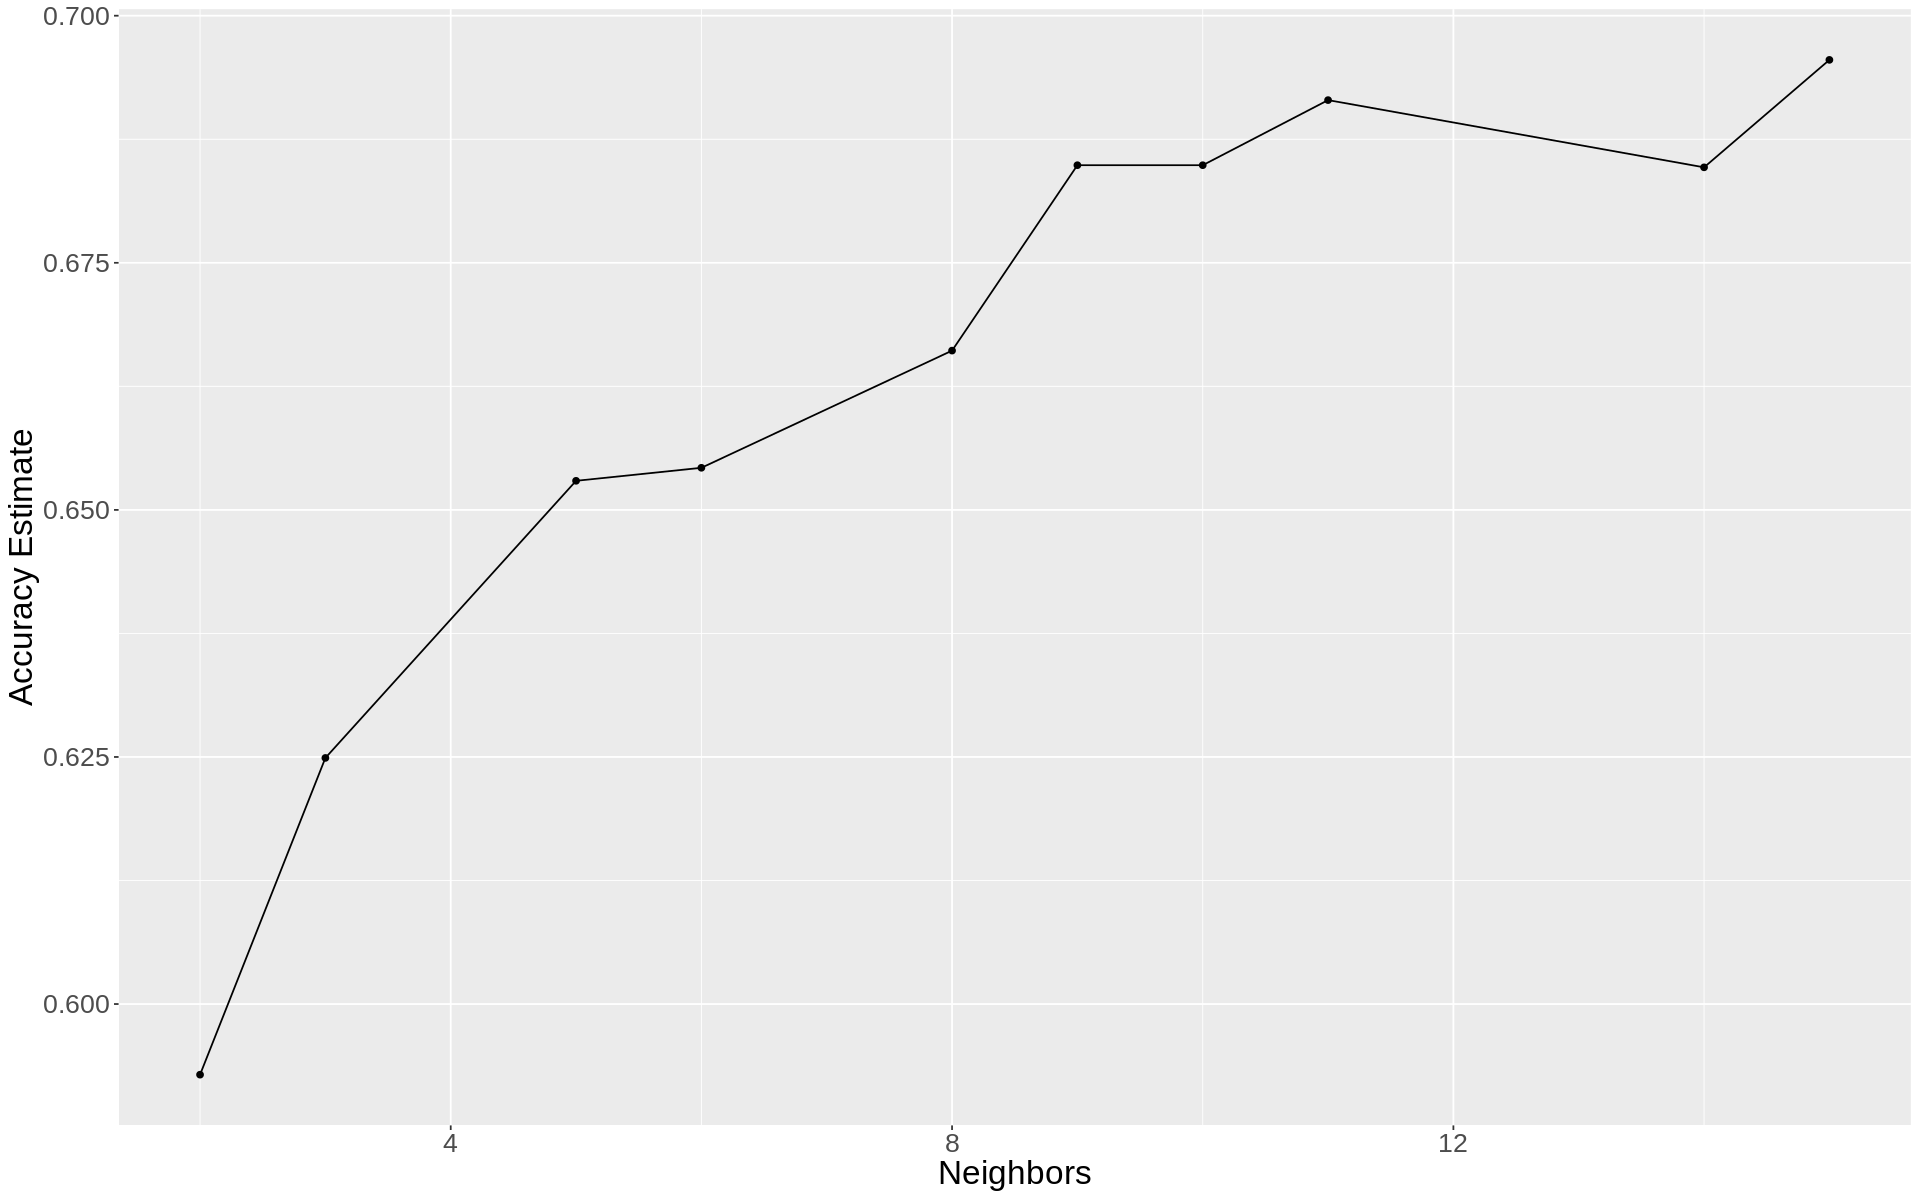

In [22]:
set.seed(2022)

exam_vfold <- vfold_cv(exam_training, v = 11, strata = test.preparation.course)

exam_recipe <- recipe(test.preparation.course ~ math.score + reading.score + writing.score, data = exam_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
  
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_results <- workflow() |>
  add_recipe(exam_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = exam_vfold, grid = 10) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

# Plot k values against their respective accuracies and choose optimal k value
cross_val_plot <- knn_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))
cross_val_plot



#### 5.2

We put together our model in a workflow (“train” our classifier).
We then made model specification for the KNN using the nearest neighbour function, including how many neighbours we want to use for predicting.  Then, we fit the model to the data and added the recipe.  At this point, we have made our model.

Next, to evaluate the accuracy of our classifier, we, will use the exam_testing subsection of the data to asses how well our model predicts (by predicting on the test set).  After using the classifier to predict the categorical variable in the test set from the numeric test scores, we add the column containing the true classifications to our data table, then we compute the accuracy of our classifier by generating a confusion matrix to look at.  This showed us that we have 171 correct predictions, and 80 incorrect.  We also use the metric function to find the accuracy of our model which was 68%.


In [23]:
set.seed(2022)

knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 13) |>
  set_engine("kknn") |>
  set_mode("classification")

exam_fit <- workflow() |>
  add_recipe(exam_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = exam_training) 

exam_predictions <- predict(exam_fit, exam_testing) |> 
    bind_cols(exam_testing)

exam_acc <- exam_predictions |> 
    metrics(truth = test.preparation.course, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)
exam_acc

exam_cm <- exam_predictions |> 
    conf_mat(truth = test.preparation.course, estimate = .pred_class)

exam_cm



.metric,.estimate
<chr>,<dbl>
accuracy,0.6812749


          Truth
Prediction   0   1
         0 141  54
         1  26  30

In [27]:
#Function for add type
ntc <- function(x) {
    switch(as.character(x), '0' = 'True Negative', '1'='False Negative','2'='True Postive','-1' = 'False Positive')
}

In [30]:
#Add Type
exam_predictions <- exam_predictions |>
    mutate(.pred_class = ifelse(.pred_class == 1, 2, 0)) |> # Prepare for type
    mutate(Type = as.numeric(test.preparation.course) - as.numeric(.pred_class)) |> # Find datra type
    mutate(Type = map(Type, ntc)) |> # Change type to Words
    mutate(.pred_class = ifelse(.pred_class == 2, 1, 0)) |>  # Back to original
    mutate(Type = as.character(Type))

head(exam_predictions)



.pred_class,test.preparation.course,math.score,reading.score,writing.score,Type
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<chr>
0,0,59,60,50,False Negative
1,0,63,77,76,False Positive
0,0,62,59,63,False Negative
0,0,23,44,44,False Negative
0,0,46,38,32,False Negative
0,0,53,60,56,False Negative


In [29]:
exam_predictions <- exam_predictions |>
mutate(Type = as_factor(Type))

exam_predictions_plot <- exam_predictions |>
  ggplot(aes(x = math.score, y = reading.score, color = Type)) +
  geom_point(alpha = 0.5) +
  labs(x = "Math Score", 
       y = "Reading Score",
       color = "Prediction Result")+
scale_color_manual(labels = c("True Negative", "True Positive", "False Positive", "False Negative"), 
                     values = c("orange2", "steelblue2", "pink", "green")) + 

  theme(text = element_text(size = 12))

exam_predictions_plot

ERROR: [1m[33mError[39m in [1m[1m`mutate()`:[22m
[1m[22m[33m![39m Problem while computing `Type = as_factor(Type)`.
[1mCaused by error in [1m[1m`UseMethod()`:[22m
[33m![39m no applicable method for 'as_factor' applied to an object of class "list"


### DISCUSSION

We found that we cannot accurately predict, using our model, whether or not a student has used the test preparation based on their test score. The accuracy of our model was 68%, which is too inaccurate to deem our classification model useful. This inaccuracy is unacceptable as we cannot correctly classify a student’s exam score when it will give us an inaccurate classification 32% of the time. With 171 correct predictions, we had 80 incorrect ones, making our model ineffective in being able to make a proper determination. We could further interpret the inability to classify data as being that we cannot determine that studying alone results in higher test scores. We cannot predict how a student will perform solely based on whether or not they studied. This builds on the question we introduced at the beginning of our project of whether or not hard work or natural intelligence determines student performance. From the results of our classifier, we can assume that hard work alone does not result in high performance, but instead natural intelligence could play a role. This would mean that there could be interplay of both a need to study and natural intelligence resulting in high academic performance. One student could study for hours but still lack the understanding of the concept to perform well, where another student may understand the concept easily without the need to study to receive a high mark. This results in our classifier being unable to make accurate predictions as we did not provide a large enough scope of data that is needed to make this classification. 


We did not expect to find this, as we expected to find that the ability does exist to predict whether or not a student has prepared using the test preparation course by their test results. We previously hypothesized that the score that a student receives is a direct indication of whether or not they have prepared well by completing the test preparation course. This was not the case, as we did not find that we could predict whether or not they had studied based on their test scores. This is likely due to having poor predictors and incomplete data. We could infer that this low accuracy could also be impacted by our data proportions. We had 66% of students having not taken the test preparation, while 34% had taken it. This may lead to our classifier tending to predict the higher likelihood class, as not doing the test preparation, rather than the lower likelihood class. From this we would see further inaccuracies in our classifications leading to lower accuracy. 


For future attempts we would need more data, and a larger scope of this data. This could include a larger dataset with more students included. It could also branch out to add more predictors to include in our classifier. There could be data collection concerning students’ previous academic performance, the exact time spent studying, as well as previous examinations in this subject. This leads to the possibility to explore the impact of natural intelligence on test scores, seeing that studying alone cannot determine high performance. By this, further study could include natural intelligence, or explore the interplay between intelligence and hours dedicated to study. 


This could lead to future questions regarding the need for preparation prior to exams. For this, more data collection would be needed so that there exists better predictors to build the classification model. An example could be: Can we predict how many hours a student has studied by their test results? In this example, a student’s performance score on an exam would be used to predict the number of hours a student spent preparing. Another stream of questioning could be: How many hours of preparation does it take to make a significant increase in an individual’s test scores? In this case, scores prior to and after studying a specific amount of hours would be collected. There are also larger questions that could be explored related to the interplay of natural intelligence and hours spent studying on exam performance. With this, exploration of a large array of predictors and datasets to determine intelligence and increased scores due to study time could be used. 


### REFERENCES

    Barbarick, K. A., & Ippolito, J. A. (2003). Does the number of hours studied affect exam performance?. Journal of Natural Resources and Life Sciences Education, 32(1), 32-35.

    Masui, C., Broeckmans, J., Doumen, S., Groenen, A., & Molenberghs, G. (2014). Do diligent students perform better? Complex relations between student and course characteristics, study time, and academic performance in higher education. Studies in Higher Education, 39(4), 621-643.
